In [48]:
import pandas as pd

selected_categories=['All Electronics',"Computers","Cell Phones & Accessories","Cell Phones &amp; Accessories"]

df_all=[]

for category in selected_categories:

    category_file = pd.read_parquet(f'../master_data/parquet/parquet/main_cat={category}/', engine="pyarrow")

    #Add category column merging Cell Phones & Accessories and Cell Phones &amp; Accessories
    if category == "Cell Phones &amp; Accessories":
        category_file['main_cat'] = "Cell Phones & Accessories"
    else:
        category_file['main_cat'] = category

    df_all.append(category_file)

df_all = pd.concat(df_all)


In [39]:
df_all.head()

,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title
0,B000069JX9,5.0,This controller works perfectly to my experien...,A11Q6CX5FY5HE6,"A controller without problems, period.",false,None,2004-06-06 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB
1,B00BZFGNPU,5.0,Received my case and it fits perfectly. The ki...,A31N5BEI8WO2U1,Perfect fit!,true,None,2013-09-04 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...
2,B000069JX9,3.0,I bought this controller at a wal mart about a...,A112X1OMQPR7SN,Absolutely what I expected.,false,None,2006-06-24 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB
3,B00BZFGNPU,5.0,I ordered this case for my Mom since her last ...,ADNPA1CQTBJIL,Awesome Case!,true,None,2014-06-16 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB


In [55]:
#show all unique categories
df_all['main_cat'].unique().sort()

In [56]:
#show all different brands sorted alphabetically
sorted_brands=df_all['brand'].unique()
sorted_brands.sort()
sorted_brands

array(['', '#1 Consumers Choice', '%3FInnove', ..., 'zhuzhu ai luo',
       'zizo', 'zonman'], dtype=object)

In [61]:
#show all unique products sorted by title alphabetically
df_all['asin'].unique().shape




(48122,)

In [70]:
# Add new column with asin and product title

df_all["asin_title"] = "PID: "+ df_all["asin"] + " Title: " + df_all["title"]

In [71]:
df_all.head()

,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title,main_cat,asin_title
0,B000069JX9,5.0,This controller works perfectly to my experien...,A11Q6CX5FY5HE6,"A controller without problems, period.",false,None,2004-06-06 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
1,B00BZFGNPU,5.0,Received my case and it fits perfectly. The ki...,A31N5BEI8WO2U1,Perfect fit!,true,None,2013-09-04 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...,All Electronics,PID: B00BZFGNPU Title: MPERO IMPACT X Series K...
2,B000069JX9,3.0,I bought this controller at a wal mart about a...,A112X1OMQPR7SN,Absolutely what I expected.,false,None,2006-06-24 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
3,B00BZFGNPU,5.0,I ordered this case for my Mom since her last ...,ADNPA1CQTBJIL,Awesome Case!,true,None,2014-06-16 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...,All Electronics,PID: B00BZFGNPU Title: MPERO IMPACT X Series K...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...


In [91]:
# Create a list of all the reviewTexts for asin = B000069JX9

selected_product = "B000069JX9"

reviews_by_product = df_all[df_all['asin'] == selected_product]

#astype(int) and replace "NonType" with 0

reviews_by_product["vote"].fillna(0, inplace=True)

reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)

p_reviews_ordered=reviews_by_product.sort_values('vote', ascending=False)
p_reviews_ordered


#Then select a specified number of reviews, probably the most voted ones

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_26360\986463544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"].fillna(0, inplace=True)
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_26360\986463544.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)


,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title,main_cat,asin_title
12,B000069JX9,5.0,"Many people don't like Microsoft, and there ar...",A1KQBK7ZTYWGZV,Nice and simple,false,27,2002-12-15 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
6,B000069JX9,5.0,"The Sidewinder USB is comfortable, programmabl...",A1TT51FSXE1V6E,Top-notch control with plenty of flexibility,false,8,2003-03-14 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
20,B000069JX9,4.0,This is about the most perfect pad out there i...,A2WXFNG33Y2TCB,Pretty Tight,false,7,2002-08-02 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
16,B000069JX9,5.0,"This is a really great gamepad, for all the re...",ADU0M5CDNLEUT,Fantastic! Where'd it go?,false,6,2004-01-04 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
18,B000069JX9,4.0,The major selling points:\n1. There are lots o...,A3S8EKK6MRBLN6,Solid Gamepad,true,5,2003-07-02 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
28,B000069JX9,3.0,This pad has a nice feel and molds to your han...,AEQXKSJZE04W,"Nice feel, mediocre play control",false,5,2002-09-22 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
14,B000069JX9,4.0,one of the easiest controller to configure. th...,AEFBL9Q079UR3,one of the best,false,4,2003-02-21 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
30,B000069JX9,1.0,The sidewinder controller just so happenes to ...,A3PDZNINGCJC2,Has a major problem,false,3,2004-08-30 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
8,B000069JX9,4.0,I'll tell you what it can do! Through all of ...,ACAWLJ657YB0B,What can the SideWinder do for you?,false,2,2003-01-03 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...


In [96]:
reviews_list=p_reviews_ordered["reviewText"].to_list()
reviews_list

['Many people don\'t like Microsoft, and there are many reasons why, but sometimes they put out a good product that makes people feel more positive about them. The Sidewinder is one of them. I needed a good controller for Grand Theft Auto 3 because playing on the keyboard was taking all the fun out of it.\nAfter comparison shopping at local electronics stores, I found that the Sidewinder was one of the best controllers around for these reasons:\n- Sturdy and solid. Won\'t break when you twist it and turn it.\n- Very comfortable to hold because of its rounded design and light weight.\n- Easy to setup. As soon as I plugged the USB into my computer, Windows automatically recognized it without any problems or need to install any drivers.\n- Many games support it right off the bat. The "joystick" option appeared in all of the games that I have on the PC - GTA3, Wolfenstein, IL-2 Shturmovik, etc.\n- The buttons are well placed and easy to differentiate, you won\'t confuse "shoot" with "jump"

In [99]:
# Select from list max reviews to send to the model

max_number = 10 # just to test, can be changed

if len(reviews_list) > max_number:
    max_reviews = reviews_list[:max_number]
else:
    max_reviews = reviews_list

max_reviews

# Send it to the language model













['Many people don\'t like Microsoft, and there are many reasons why, but sometimes they put out a good product that makes people feel more positive about them. The Sidewinder is one of them. I needed a good controller for Grand Theft Auto 3 because playing on the keyboard was taking all the fun out of it.\nAfter comparison shopping at local electronics stores, I found that the Sidewinder was one of the best controllers around for these reasons:\n- Sturdy and solid. Won\'t break when you twist it and turn it.\n- Very comfortable to hold because of its rounded design and light weight.\n- Easy to setup. As soon as I plugged the USB into my computer, Windows automatically recognized it without any problems or need to install any drivers.\n- Many games support it right off the bat. The "joystick" option appeared in all of the games that I have on the PC - GTA3, Wolfenstein, IL-2 Shturmovik, etc.\n- The buttons are well placed and easy to differentiate, you won\'t confuse "shoot" with "jump"

<Axes: >

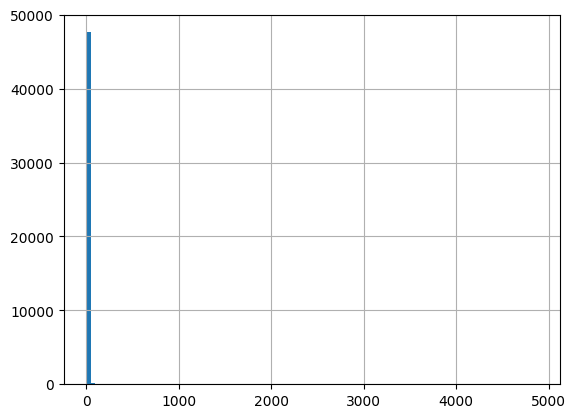

In [102]:
#Group by asin and get the count of rows in a single column
df_all.groupby('asin').count()["overall"].hist(bins=100)
